In [4]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")


In [5]:
train_full_df= pd.read_csv("train.csv")
test_full_df=pd.read_csv("test.csv")
pred_df = pd.read_csv("gender_submission[1].csv")


In [6]:
train_full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
pred_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
test_full_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
#to find the no. of rows and columns #total passengers=891
train_full_df.shape

(891, 12)

In [10]:
#finding frequency of categorical column
train_full_df['Survived'].value_counts()#people who didn't survived= 549 , #people who survived=342

0    549
1    342
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

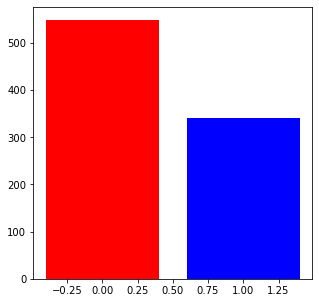

In [11]:
#plotting the information of how many passengers survived using bar plot
plt.figure(figsize=(5,5))
plt.bar(list(train_full_df['Survived'].value_counts().keys()),list(train_full_df['Survived'].value_counts()),color=['r','b'])
#red bar indicates all those folks who lost their life #blue bar indicates all those who have survived..

In [12]:
train_full_df['Pclass'].value_counts()
#class 3 that is the higher class survived the most

3    491
1    216
2    184
Name: Pclass, dtype: int64

<BarContainer object of 3 artists>

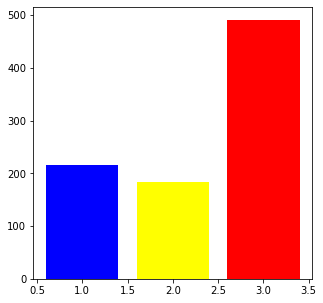

In [13]:
plt.figure(figsize=(5,5))
plt.bar(list(train_full_df['Pclass'].value_counts().keys()),list(train_full_df['Pclass'].value_counts()),color=['r','b','yellow'])

In [14]:
train_full_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<BarContainer object of 2 artists>

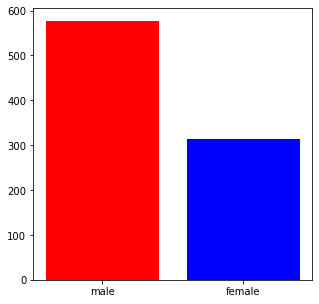

In [15]:
plt.figure(figsize=(5,5))
plt.bar(list(train_full_df['Sex'].value_counts().keys()),list(train_full_df['Sex'].value_counts()),color=['r','b'])

Text(0, 0.5, 'Passengers')

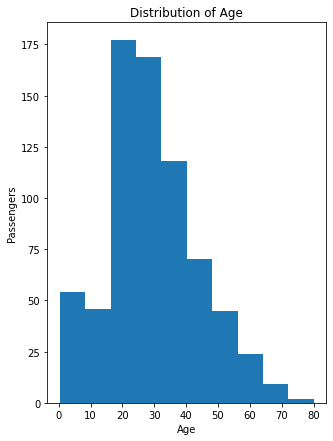

In [16]:

plt.figure(figsize=(5,7))
plt.hist(train_full_df['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Passengers")
#most of the passengers are between 20 and 30 #very few senior citizens

# DATA CLEANING

In [17]:
train_full_df.columns[train_full_df.isna().any()] 

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [18]:
train_full_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
test_full_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
train_full_df['Embarked']=train_full_df['Embarked'].fillna('Q')

In [21]:
train_full_df['Age']=train_full_df['Age'].fillna(train_full_df.Age.mean())

In [22]:
l=LabelEncoder()
train_full_df['Sex']=l.fit_transform(train_full_df['Sex'])
test_full_df['Sex']=l.fit_transform(test_full_df['Sex'])

In [23]:
type('Embarked')

str

In [24]:
l=LabelEncoder()
train_full_df['Embarked']=l.fit_transform(train_full_df['Embarked'])
test_full_df['Embarked']=l.fit_transform(test_full_df['Embarked'])

# TRAIN SET AND TEST SET

In [25]:
xtrain = train_full_df.drop(['Cabin','Survived','Name','Ticket','PassengerId'],axis=1)
ytrain = train_full_df['Survived']

In [26]:
xtest = test_full_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
ytest = pred_df['Survived']

In [27]:
xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [28]:
xtest['Age']=xtest['Age'].fillna(xtest.Age.mean())

In [29]:
xtest.isnull().sum()


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [30]:
xtest['Fare']=xtest['Fare'].fillna(xtest.Fare.mean())

# Training

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtc = DecisionTreeClassifier()


In [33]:
dtc.fit( xtrain, ytrain)

DecisionTreeClassifier()

In [34]:
dtc.score(xtest,ytest) #76.5% of predicted values for survived are correct

0.777511961722488

In [38]:
y_predict = dtc.predict(xtest)
y_predict

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [39]:
accuracy_score(ytest,y_predict)

0.777511961722488

# By Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression


In [44]:
lr = LogisticRegression()

In [45]:
xtrain=pd.concat([xtrain,xtest])
ytrain=pd.concat([ytrain,ytest])

In [46]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [47]:
predictions = lr.predict(xtest)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
lr.score(xtest,ytest)

0.992822966507177

In [49]:
accuracy_score(predictions,ytest)

0.992822966507177

In [52]:

Data = test_full_df[['PassengerId']]
Data['Survived']=predictions
Data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
